# GTEx clustering analysis

In [2]:
library(here)
library(dplyr)
library(Rtsne)
library(ggplot2)
library(scales)
set.seed(123)
library(dplyr)
source(here("config.R"))

here() starts at /home/msubirana/Documents/pivlab/plier2-analyses


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
gtex_plier2 <- readRDS(here('output/gtex/gtex_PLIER2.rds'))

In [4]:
gtex_B  <- data.frame(as.matrix(gtex_plier2$B))

In [5]:
head(gtex_B)

GTEX.1117F.0226.SM.5GZZ7 GTEX.1117F.0426.SM.5EGHI GTEX.1117F.0526.SM.5EGHJ
LV1 -0.001996071             -0.17177932               0.37175520             
LV2 -0.007366913             -0.07904385              -0.06618871             
LV3 -0.027424993             -0.12991085               0.26623758             
LV4 -0.032972727             -0.01279773              -0.03832356             
LV5 -0.237416460             -0.05128643              -0.32621112             
LV6  0.113137912             -0.02838519               0.09060313             
    GTEX.1117F.0626.SM.5N9CS GTEX.1117F.0726.SM.5GIEN GTEX.1117F.1326.SM.5EGHH
LV1  0.29630823               0.0417361423            -0.17759329             
LV2  0.02950967               0.0137848493             0.05256078             
LV3  0.08792828               0.3045879024             0.87754667             
LV4 -0.04645557              -0.0265536246             0.02759365             
LV5 -0.17729015               0.0005296356            -0.14077236             
LV6  0.03817960              -0.1309868726            -0.08703183             
    GTEX.1117F.2426.SM.5EGGH GTEX.1117F.2526.SM.5GZY6 GTEX.1117F.2826.SM.5GZXL
LV1  0.06224892              -0.133085952             -0.128990027            
LV2  0.03923502               0.041920420              0.039229944            
LV3 -0.02713904               0.083964878              0.228213808            
LV4 -0.03862814              -0.072075046             -0.072642116            
LV5 -0.13892438               0.109910412             -0.141782781            
LV6  0.08357237              -0.008223451              0.000362112            
    GTEX.1117F.2926.SM.5GZYI ⋯ GTEX.ZZPU.1126.SM.5N9CW GTEX.ZZPU.1226.SM.5N9CK
LV1 -0.10360368              ⋯  0.12990498             -0.07878671            
LV2  0.02928616              ⋯ -0.03298658             -0.05153172            
LV3 -0.13788913              ⋯  0.01803576             -0.03783572            
LV4 -0.02687103              ⋯ -0.03048997             -0.05856136            
LV5 -0.11271587              ⋯  0.23718304              0.14859859            
LV6 -0.06311435              ⋯ -0.13731111             -0.08775167            
    GTEX.ZZPU.1326.SM.5GZWS GTEX.ZZPU.1426.SM.5GZZ6 GTEX.ZZPU.1826.SM.5E43L
LV1  0.13234024             -0.10201980             -0.04368834            
LV2 -0.02177846             -0.04186566             -0.04859947            
LV3  0.44882181              0.30492352             -0.01831873            
LV4 -0.03930446             -0.02803328             -0.05697038            
LV5  0.08486135              0.04298099             -0.05112148            
LV6  0.04220346             -0.11842065             -0.05654503            
    GTEX.ZZPU.2126.SM.5EGIU GTEX.ZZPU.2226.SM.5EGIV GTEX.ZZPU.2426.SM.5E44I
LV1  0.233400836            -0.218585487             0.67890371            
LV2 -0.100795907            -0.005755683            -0.09678039            
LV3  0.003157641            -0.007765243            -0.04482186            
LV4 -0.139670789            -0.050308190            -0.07187161            
LV5 -0.065985270             0.077490913            -0.21585592            
LV6  0.010828251            -0.126906181            -0.02506434            
    GTEX.ZZPU.2626.SM.5E45Y GTEX.ZZPU.2726.SM.5NQ8O
LV1 -0.20314197              0.011847403           
LV2 -0.06160179             -0.024521240           
LV3 -0.11218835              0.167161654           
LV4 -0.01218328             -0.043234313           
LV5  0.28854279             -0.083955540           
LV6 -0.12540800             -0.005404993

In [6]:
colnames(gtex_B) <- gsub("\\.", "-", colnames(gtex_B))

In [7]:
gtex_summary_sig  <- gtex_plier2$summary %>% 
dplyr::filter(FDR < 0.05)  %>% 
dplyr::filter(AUC > 0.7)

head(gtex_summary_sig)
tail(gtex_summary_sig)

pathway                                                     LV  AUC      
1 GTEx_Tissues_Artery - Aorta Female 60-69 Up                 LV1 0.9813570
2 GTEx_Tissues_Artery - Aorta Female 20-29 Up                 LV1 0.9854310
3 GTEx_Tissues_Brain - Cerebellar Hemisphere Female 20-29 Up  LV2 0.9869713
4 GTEx_Tissues_Brain - Cerebellum Female 30-39 Up             LV2 0.9883268
5 BP_Antigen Receptor-Mediated Signaling Pathway (GO:0050851) LV3 0.8006547
6 BP_Negative Regulation of T Cell Activation (GO:0050868)    LV3 0.7712556
  p-value      FDR         
1 1.007707e-14 2.577286e-13
2 6.078405e-15 2.014044e-13
3 5.861843e-13 5.889756e-12
4 2.850779e-12 2.406058e-11
5 4.646500e-07 2.142976e-06
6 2.552023e-03 8.252519e-03

pathway                                                               
299 BP_Male Gamete Generation (GO:0048232)                                
300 KEGG_Ribosome                                                         
301 BP_Aerobic Electron Transport Chain (GO:0019646)                      
302 BP_Cellular Respiration (GO:0045333)                                  
303 BP_Proton Motive Force-Driven Mitochondrial ATP Synthesis (GO:0042776)
304 BP_Response to Fibroblast Growth Factor (GO:0071774)                  
    LV    AUC       p-value      FDR         
299 LV201 0.9335841 1.232064e-02 3.311662e-02
300 LV202 0.9696335 1.132588e-17 3.186346e-15
301 LV202 0.8638916 2.634417e-06 1.152045e-05
302 LV202 0.7168919 8.627369e-04 3.020105e-03
303 LV202 0.8136849 6.741986e-04 2.380852e-03
304 LV203 0.8964596 4.953230e-03 1.487732e-02

In [8]:
gtex_meta <- read.table(
    here('data/gtex/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt'), 
    sep = '\t', 
    header = TRUE,
    quote = "", 
    fill = TRUE,
    comment.char = "" 
)

In [9]:
head(gtex_meta)

SAMPID                        SMATSSCR SMCENTER
1 GTEX-1117F-0003-SM-58Q7G      NA       B1      
2 GTEX-1117F-0003-SM-5DWSB      NA       B1      
3 GTEX-1117F-0003-SM-6WBT7      NA       B1      
4 GTEX-1117F-0011-R10a-SM-AHZ7F NA       B1, A1  
5 GTEX-1117F-0011-R10b-SM-CYKQ8 NA       B1, A1  
6 GTEX-1117F-0226-SM-5GZZ7       0       B1      
  SMPTHNTS                                     SMRIN SMTS          
1                                               NA   Blood         
2                                               NA   Blood         
3                                               NA   Blood         
4                                               NA   Brain         
5                                              7.2   Brain         
6 2 pieces, ~15% vessel stroma, rep delineated 6.8   Adipose Tissue
  SMTSD                        SMUBRID SMTSISCH SMTSPAX ⋯ SME1ANTI SMSPLTRD
1 Whole Blood                  0013756 1188       NA    ⋯       NA       NA
2 Whole Blood                  0013756 1188       NA    ⋯       NA       NA
3 Whole Blood                  0013756 1188       NA    ⋯       NA       NA
4 Brain - Frontal Cortex (BA9) 0009834 1193       NA    ⋯       NA       NA
5 Brain - Frontal Cortex (BA9) 0009834 1193       NA    ⋯       NA       NA
6 Adipose - Subcutaneous       0002190 1214     1125    ⋯ 14648800 11999300
  SMBSMMRT   SME1SNSE SME1PCTS SMRRNART   SME1MPRT SMNUM5CD SMDPMPRT SME2PCTS
1         NA       NA      NA          NA      NA  NA       NA            NA 
2         NA       NA      NA          NA      NA  NA       NA            NA 
3         NA       NA      NA          NA      NA  NA       NA            NA 
4         NA       NA      NA          NA      NA  NA       NA            NA 
5         NA       NA      NA          NA      NA  NA       NA            NA 
6 0.00315785 14669500 50.0354  0.00310538 0.99474  NA        0       50.1944

In [10]:
table(colnames(gtex_B) %in% gtex_meta$SAMPID)


 TRUE 
17382 

In [11]:
tissues_to_keep <- names(table(gtex_meta$SMTS)[table(gtex_meta$SMTS) >= 200])

gtex_meta_filtered <- gtex_meta %>% dplyr::filter(SMTS %in% tissues_to_keep)

table(gtex_meta_filtered$SMTS)


Adipose Tissue  Adrenal Gland          Blood   Blood Vessel    Bone Marrow 
          1327            275           3480           1473            217 
         Brain         Breast          Colon      Esophagus          Heart 
          3326            480            821           1582           1141 
         Liver           Lung         Muscle          Nerve       Pancreas 
           251            867           1132            722            360 
     Pituitary       Prostate           Skin         Spleen        Stomach 
           301            262           2014            260            381 
        Testis        Thyroid 
           406            812 

In [12]:
gtex_B <- gtex_B %>%
    dplyr::select(any_of(gtex_meta_filtered$SAMPID))

# T-SNE of GTEx samples

In [13]:
mat_jitter <- jitter(t(gtex_B), factor = 1e-6)
tsne_res <- Rtsne(mat_jitter, perplexity = 30, max_iter = 1000, verbose = TRUE, check_duplicates = FALSE)
tsne_df <- data.frame(
  sample_id = rownames(mat_jitter),
  tSNE_1    = tsne_res$Y[,1],
  tSNE_2    = tsne_res$Y[,2]
) %>%
  left_join(
    gtex_meta_filtered %>% select(SAMPID, SMTS) %>% rename(sample_id = SAMPID, tissue = SMTS),
    by = "sample_id"
  )
tsne_centroids <- tsne_df %>%
  group_by(tissue) %>%
  summarise(tSNE_1 = mean(tSNE_1), tSNE_2 = mean(tSNE_2))

Performing PCA
Read the 16417 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 16417
Done in 4.81 seconds (sparsity = 0.007597)!
Learning embedding...
Iteration 50: error is 102.988009 (50 iterations in 2.04 seconds)
Iteration 100: error is 89.192582 (50 iterations in 2.19 seconds)
Iteration 150: error is 77.773689 (50 iterations in 2.08 seconds)
Iteration 200: error is 74.301051 (50 iterations in 2.05 seconds)
Iteration 250: error is 72.537626 (50 iterations in 2.04 seconds)
Iteration 300: error is 2.948442 (50 iterations in 1.92 seconds)
Iteration 350: error is 2.631980 (50 iterations in 1.86 seconds)
Iteration 400: error is 2.399362 (50 iterations in 1.85 seconds)
Iteration 450: error is 2.231382 (50 iterations in 1.85 seconds)
Iteration 500: error is 2.103350 (50 iterations in 1.83 seconds)
Iteration 550: error is 2.003763 (50 iterations in 

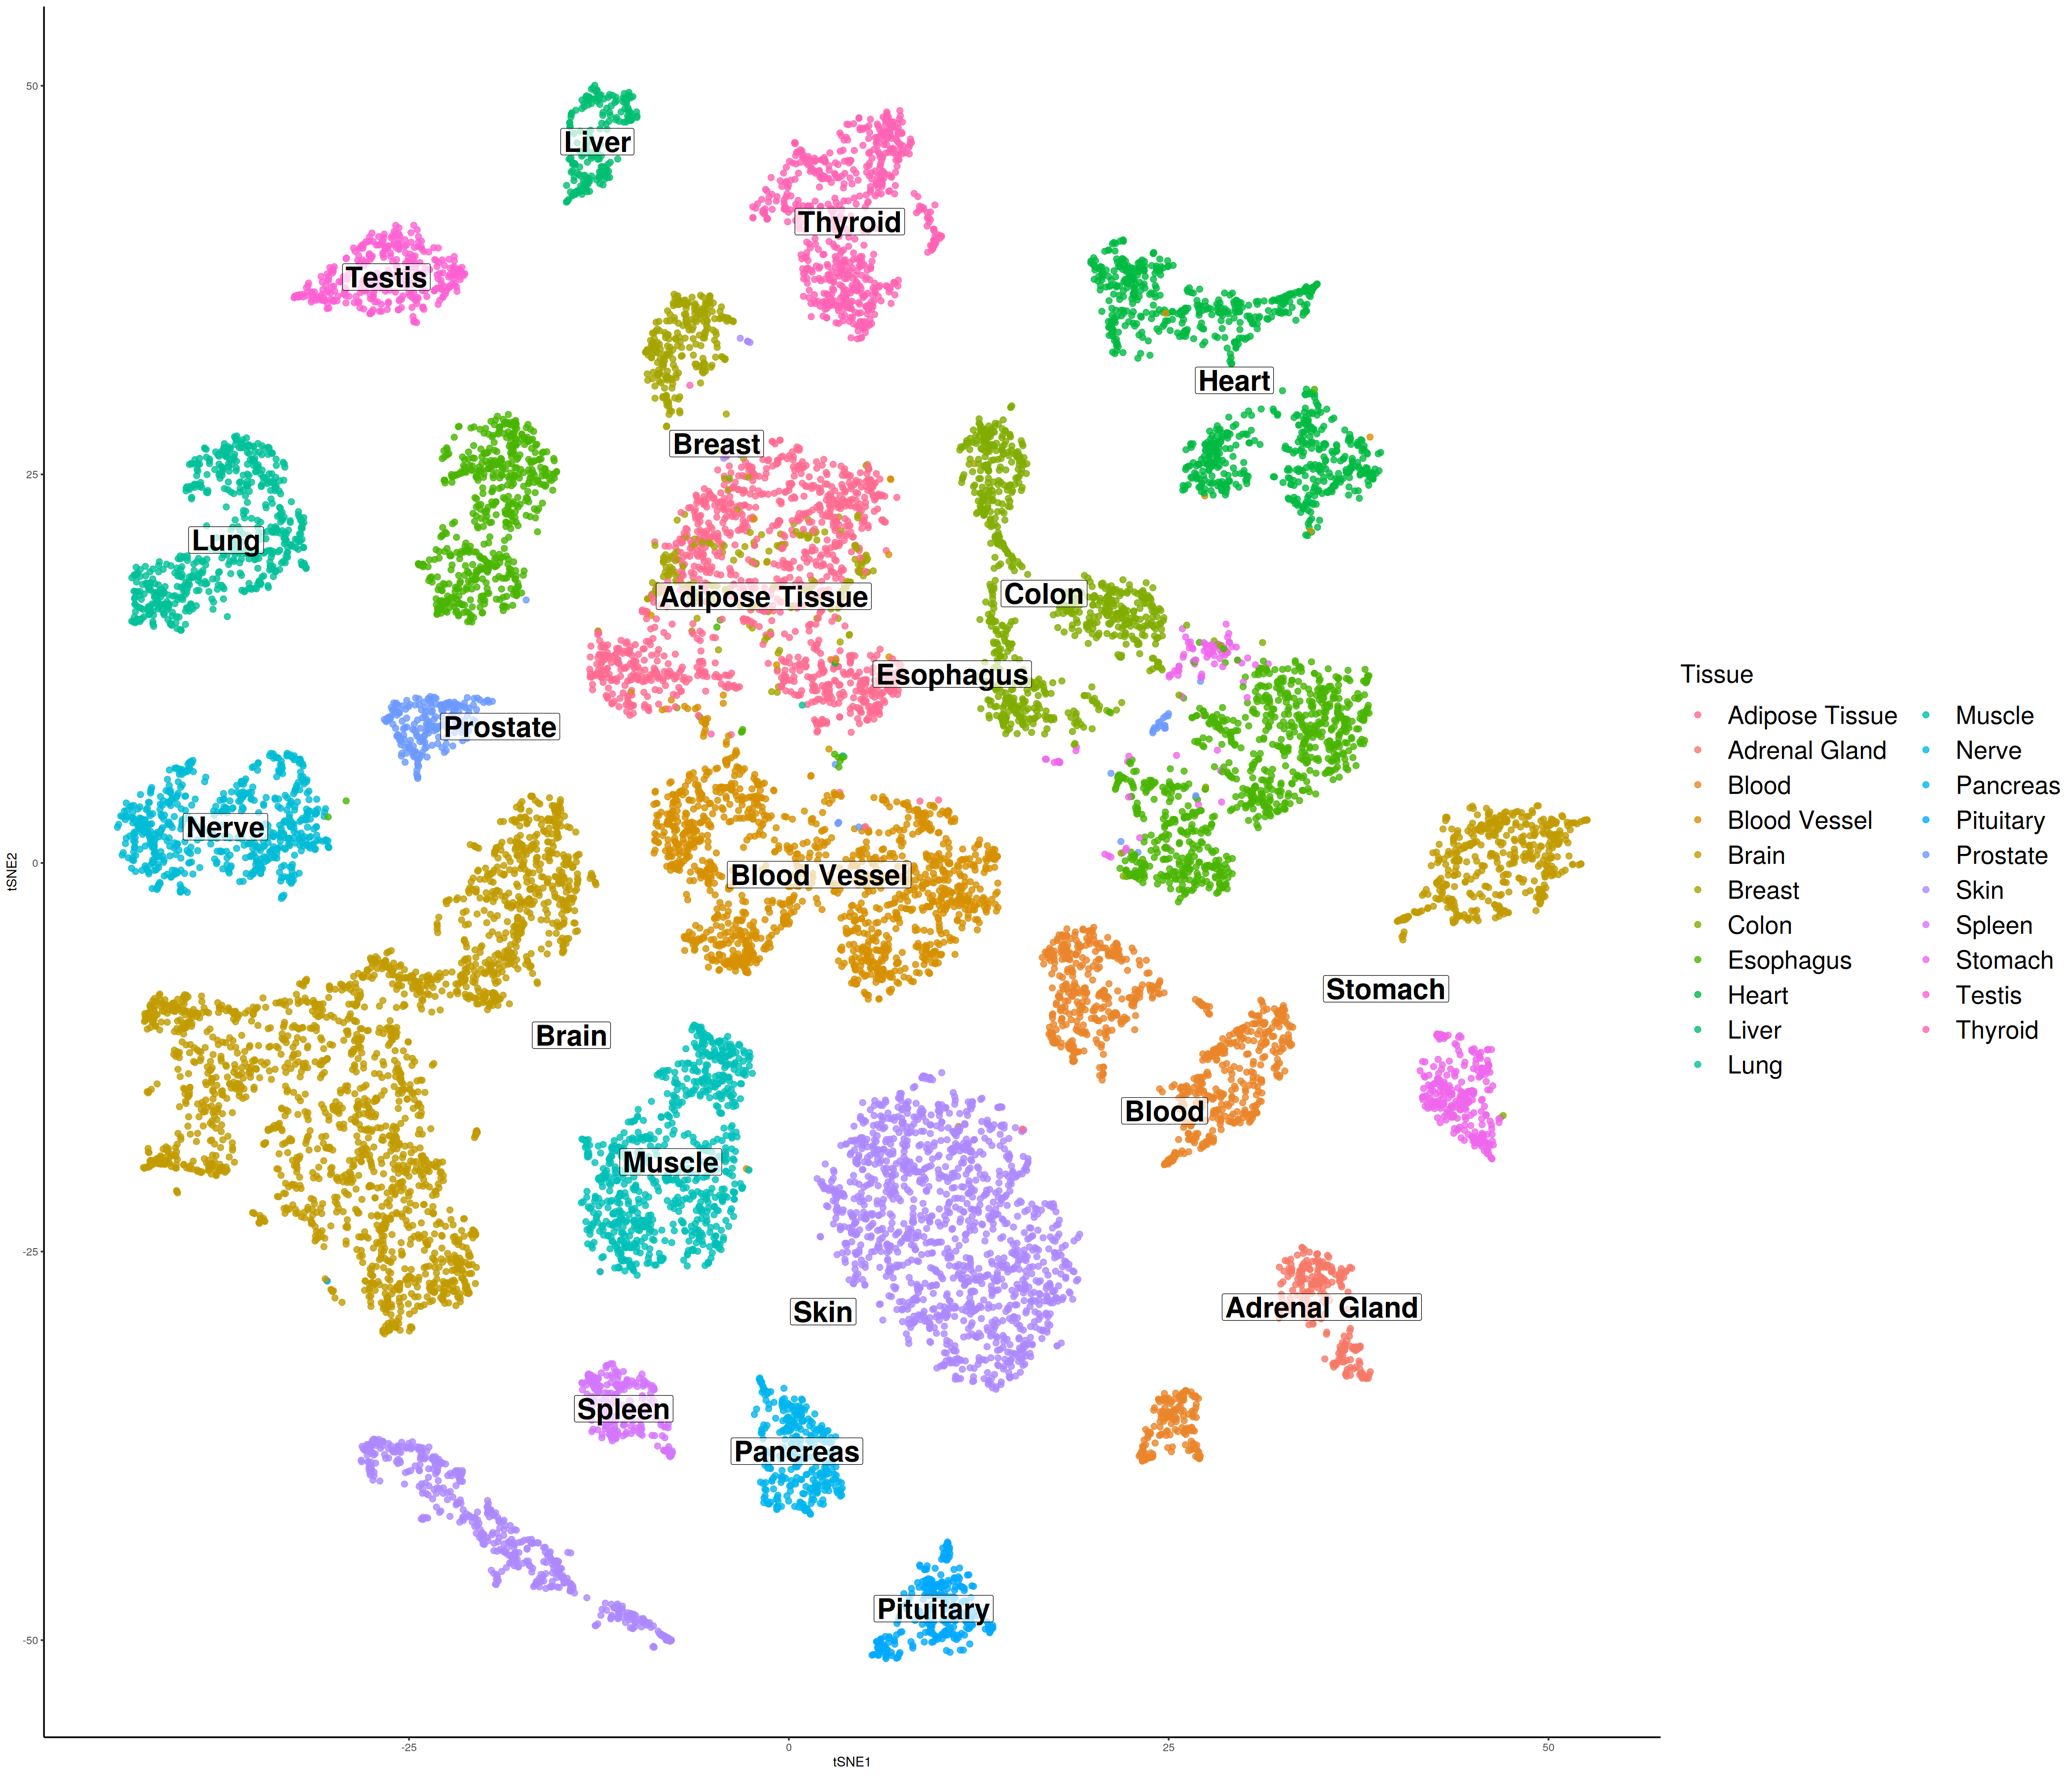

In [14]:
options(repr.plot.width = 35, repr.plot.height = 30)

n_tissues <- n_distinct(tsne_df$tissue)
palette_hue <- hue_pal(h = c(0, 360), c = 100, l = 65)(n_tissues)

ggplot(tsne_df, aes(tSNE_1, tSNE_2, colour = tissue)) +
  geom_point(size = 3, alpha = 0.8) +
  geom_label(
    data = tsne_centroids,
    aes(label = tissue),
    size = 12, fontface = "bold",
    colour = "black", fill = "white", alpha = 0.7
  ) +
  scale_color_manual(values = palette_hue) +
  labs(
    x = "tSNE1", y = "tSNE2", colour = "Tissue"
  ) +
  theme_classic(base_size = 16) +
  theme(
    legend.key.size = unit(1.5, "cm"),
    legend.text       = element_text(size = 30),
    legend.title      = element_text(size = 30)
  )


# Most important LVs for tissue

In [15]:
gtex_meta %>%
dplyr::select(SMTSD)  %>% 
table()

SMTSD
                   Adipose - Subcutaneous 
                                      763 
             Adipose - Visceral (Omentum) 
                                      564 
                            Adrenal Gland 
                                      275 
                           Artery - Aorta 
                                      450 
                        Artery - Coronary 
                                      253 
                          Artery - Tibial 
                                      770 
                                  Bladder 
                                       21 
                         Brain - Amygdala 
                                      177 
 Brain - Anterior cingulate cortex (BA24) 
                                      213 
          Brain - Caudate (basal ganglia) 
                                      291 
            Brain - Cerebellar Hemisphere 
                                      263 
                       Brain - Cerebellum 
     

In [16]:
meta <- gtex_meta %>%
  select(SAMPID, SMTSD) %>%
  mutate(SAMPID = trimws(SAMPID)) %>% 
  slice(match(colnames(gtex_B), SAMPID))

tissues <- unique(meta$SMTSD)

best_LV_by_tissue <- sapply(tissues, function(tiss) {
  group <- meta$SMTSD == tiss
  # compute Mann-Whitney U statistic for each LV
  mann_whitney_stats <- apply(gtex_B, 1, function(vals) {
    x1 <- vals[group]; x2 <- vals[!group]
    wilcox.test(x1, x2, exact = FALSE)$statistic
  })
  names(which.max(mann_whitney_stats))
})

best_LV_by_tissue  <- data.frame(best_LV_by_tissue)
colnames(best_LV_by_tissue) <- 'LV'
best_LV_by_tissue <-  best_LV_by_tissue  %>% 
tibble::rownames_to_column('tissue')

In [17]:
best_LV_by_tissue

tissue                                    LV   
1  Adipose - Subcutaneous                    LV130
2  Muscle - Skeletal                         LV39 
3  Artery - Tibial                           LV166
4  Artery - Coronary                         LV179
5  Heart - Atrial Appendage                  LV52 
6  Adipose - Visceral (Omentum)              LV151
7  Breast - Mammary Tissue                   LV35 
8  Skin - Not Sun Exposed (Suprapubic)       LV169
9  Brain - Cortex                            LV121
10 Adrenal Gland                             LV28 
11 Thyroid                                   LV11 
12 Lung                                      LV29 
13 Spleen                                    LV43 
14 Pancreas                                  LV25 
15 Esophagus - Muscularis                    LV42 
16 Esophagus - Mucosa                        LV113
17 Esophagus - Gastroesophageal Junction     LV182
18 Stomach                                   LV91 
19 Colon - Sigmoid                           LV9  
20 Colon - Transverse                        LV196
21 Prostate                                  LV135
22 Testis                                    LV76 
23 Nerve - Tibial                            LV171
24 Skin - Sun Exposed (Lower leg)            LV18 
25 Heart - Left Ventricle                    LV145
26 Brain - Cerebellum                        LV172
27 Cells - Cultured fibroblasts              LV13 
28 Whole Blood                               LV12 
29 Artery - Aorta                            LV84 
30 Cells - EBV-transformed lymphocytes       LV4  
31 Pituitary                                 LV57 
32 Brain - Frontal Cortex (BA9)              LV156
33 Brain - Caudate (basal ganglia)           LV147
34 Brain - Nucleus accumbens (basal ganglia) LV22 
35 Brain - Putamen (basal ganglia)           LV147
36 Brain - Hypothalamus                      LV80 
37 Brain - Spinal cord (cervical c-1)        LV132
38 Brain - Hippocampus                       LV121
39 Brain - Anterior cingulate cortex (BA24)  LV121
40 Brain - Cerebellar Hemisphere             LV174
41 Liver                                     LV15 
42 Brain - Substantia nigra                  LV71 
43 Brain - Amygdala                          LV121

In [18]:
output_data_dir <- config$GTEx$DATASET_FOLDER
summ_all_summaries <- readRDS(file.path(output_data_dir, "all_summaries.rds"))

In [19]:
dplyr::left_join(best_LV_by_tissue, summ_all_summaries)

Joining with `by = join_by(LV)`


tissue                                    LV   
1  Adipose - Subcutaneous                    LV130
2  Muscle - Skeletal                         LV39 
3  Artery - Tibial                           LV166
4  Artery - Coronary                         LV179
5  Heart - Atrial Appendage                  LV52 
6  Adipose - Visceral (Omentum)              LV151
7  Breast - Mammary Tissue                   LV35 
8  Skin - Not Sun Exposed (Suprapubic)       LV169
9  Brain - Cortex                            LV121
10 Adrenal Gland                             LV28 
11 Thyroid                                   LV11 
12 Lung                                      LV29 
13 Spleen                                    LV43 
14 Pancreas                                  LV25 
15 Esophagus - Muscularis                    LV42 
16 Esophagus - Mucosa                        LV113
17 Esophagus - Gastroesophageal Junction     LV182
18 Stomach                                   LV91 
19 Colon - Sigmoid                           LV9  
20 Colon - Transverse                        LV196
21 Prostate                                  LV135
22 Testis                                    LV76 
23 Nerve - Tibial                            LV171
24 Skin - Sun Exposed (Lower leg)            LV18 
25 Heart - Left Ventricle                    LV145
26 Brain - Cerebellum                        LV172
27 Cells - Cultured fibroblasts              LV13 
28 Whole Blood                               LV12 
29 Artery - Aorta                            LV84 
30 Cells - EBV-transformed lymphocytes       LV4  
31 Pituitary                                 LV57 
32 Brain - Frontal Cortex (BA9)              LV156
33 Brain - Caudate (basal ganglia)           LV147
34 Brain - Nucleus accumbens (basal ganglia) LV22 
35 Brain - Putamen (basal ganglia)           LV147
36 Brain - Hypothalamus                      LV80 
37 Brain - Spinal cord (cervical c-1)        LV132
38 Brain - Hippocampus                       LV121
39 Brain - Anterior cingulate cortex (BA24)  LV121
40 Brain - Cerebellar Hemisphere             LV174
41 Liver                                     LV15 
42 Brain - Substantia nigra                  LV71 
43 Brain - Amygdala                          LV121
   pathway_prior                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1  all_GTEx_Tissues_Breast - Mammary Tissue Female 70-79 U

## Traits

In [20]:
traits_gtex <- readRDS(here('data/gtex/phenoplier/gtex-phenoplier.rds'))
head(traits_gtex)

phenotype phenotype_desc lv    pvalue       fdr        
0 1498      Coffee intake  LV163 2.484123e-06 0.003965477
1 1498      Coffee intake  LV73  3.482571e-05 0.032528463
2 1498      Coffee intake  LV158 8.523213e-05 0.061765081
3 1498      Coffee intake  LV135 5.915558e-03 0.573669473
4 1498      Coffee intake  LV110 6.121001e-03 0.579520527
5 1498      Coffee intake  LV137 6.815828e-03 0.594918544

In [21]:
traits_gtex_sig <- traits_gtex %>%
dplyr::select(lv, phenotype_desc, fdr) %>%
dplyr::rename(LV=lv, FDR=fdr, phenotype=phenotype_desc) %>% 
dplyr::filter(FDR < 0.05) %>% 
dplyr::select(LV, phenotype) %>%
group_by(LV) %>%
summarise(phenotype = paste(phenotype, collapse = '; '))

head(traits_gtex_sig)

LV   
1 LV1  
2 LV10 
3 LV100
4 LV101
5 LV102
6 LV103
  phenotype                                                                                                                                                                                                                                                                            
1 Treatment/medication code: amiodarone (20003_1140888502); Job SOC coding: Merchandisers and window dressers; Job SOC coding: Travel agency managers; Job coding: travel agency manager/owner, tourist manager (22601_12263368)                                                       
2 Relative age of first facial hair; Other and unsepcified mononeuropathies, also in other diseases                                                                                                                                                                                    
3 Treatment/medication code: indometacin (20003_1140909936); Diagnoses - main ICD10: R29 Other symptoms and signs involving the nervous and musculoskeletal systems; Non-cancer illness code, self-reported: type 1 diabetes; Age diabetes diagnosed; Type 1 diabetes with ketoacidosis
4 Treatment/medication code: allopurinol (20003_1140875408); Non-cancer illness code, self-reported: gout; Ever had laser treatment for glaucoma or high eye pressure: Both eyes                                                                                                       
5 Neutrophill percentage; White blood cell (leukocyte) count; Eosinophill percentage; Crohn's disease of large intestine; Lymphocyte percentage; Neutrophill count; Eosinophill count                                                                                                  
6 Eosinophill percentage; Eosinophill count

In [22]:
dplyr::left_join(best_LV_by_tissue, traits_gtex_sig)

Joining with `by = join_by(LV)`


tissue                                    LV   
1  Adipose - Subcutaneous                    LV130
2  Muscle - Skeletal                         LV39 
3  Artery - Tibial                           LV166
4  Artery - Coronary                         LV179
5  Heart - Atrial Appendage                  LV52 
6  Adipose - Visceral (Omentum)              LV151
7  Breast - Mammary Tissue                   LV35 
8  Skin - Not Sun Exposed (Suprapubic)       LV169
9  Brain - Cortex                            LV121
10 Adrenal Gland                             LV28 
11 Thyroid                                   LV11 
12 Lung                                      LV29 
13 Spleen                                    LV43 
14 Pancreas                                  LV25 
15 Esophagus - Muscularis                    LV42 
16 Esophagus - Mucosa                        LV113
17 Esophagus - Gastroesophageal Junction     LV182
18 Stomach                                   LV91 
19 Colon - Sigmoid                           LV9  
20 Colon - Transverse                        LV196
21 Prostate                                  LV135
22 Testis                                    LV76 
23 Nerve - Tibial                            LV171
24 Skin - Sun Exposed (Lower leg)            LV18 
25 Heart - Left Ventricle                    LV145
26 Brain - Cerebellum                        LV172
27 Cells - Cultured fibroblasts              LV13 
28 Whole Blood                               LV12 
29 Artery - Aorta                            LV84 
30 Cells - EBV-transformed lymphocytes       LV4  
31 Pituitary                                 LV57 
32 Brain - Frontal Cortex (BA9)              LV156
33 Brain - Caudate (basal ganglia)           LV147
34 Brain - Nucleus accumbens (basal ganglia) LV22 
35 Brain - Putamen (basal ganglia)           LV147
36 Brain - Hypothalamus                      LV80 
37 Brain - Spinal cord (cervical c-1)        LV132
38 Brain - Hippocampus                       LV121
39 Brain - Anterior cingulate cortex (BA24)  LV121
40 Brain - Cerebellar Hemisphere             LV174
41 Liver                                     LV15 
42 Brain - Substantia nigra                  LV71 
43 Brain - Amygdala                          LV121
   phenotype                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1  NA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
2  FI6 : conditional arithmetic; Bread type: White; Other appendicitis; Arm fat percentage (left)                                                                                                                                                                                                                                                                                                                                                                                                                                                    